In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples

In [12]:
### HELPER FUNCTIONS ###

def plot_inertia(X, k_max = 10):
    """
    Plot k-means inertia scores for the given input
    """
    inertia = []
    k_vals = []
    # Calculate inertia from k = 1-9
    for k in range(1, k_max + 1):
        k_vals.append(k)
        model = KMeans(n_clusters=k)
        model.fit(X)
        inertia.append(model.inertia_)
        
    # Plot inertia
    plt.plot(k_vals, inertia, marker = 'o')
    plt.ylabel("Inertia")
    plt.xlabel("k (number of clusters)")

def plot_mean_sil(X, k_max=10):
    """
    Plot mean silhouete scores for the given input
    """
    silhoue = []
    k_vals = []
    # Calculate average silhouette score for k = 2-9
    for k in range(2, k_max + 1):
        k_vals.append(k)
        model = KMeans(n_clusters=k)
        model.fit(X)
        sil = metrics.silhouette_score(X, model.labels_, metric='euclidean')
        silhoue.append(sil)

    # Plot mean silhouette scores
    plt.plot(k_vals, silhoue)
    plt.xlabel("k (number of clusters)")
    plt.ylabel("Mean Silhouette Score")

def plot_sil(X,k):
    """
    Plot silhouette distributions for the given input and given
    number of clusters
    """
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    y_predict = kmeans.fit_predict(X)
    silhouette_vals = silhouette_samples(X,y_predict)

    y_ticks = []
    y_lower = y_upper = 0
    for i,cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        
        plt.barh(range(y_lower,y_upper),
        cluster_silhouette_vals,height =1)
        plt.text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)
            
        # Get the average silhouette score 
        avg_score = np.mean(silhouette_vals)
        plt.axvline(avg_score,linestyle ='--',
        linewidth =2,color = 'green')
        plt.yticks([])
        plt.xlim([-0.1, 1])
        #plt.set_xlabel('Silhouette coefficient values')
        plt.xlabel('Silhouette Scores')
        plt.ylabel('Cluster Labels')

def k_means(X,k):
    """
    Perform k-means clustering on the given input X with k clusters.
    Plot the centroid.
    Return the centroids and predicted cluster values.
    """

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    centroids = kmeans.cluster_centers_

    # Plot cluster centers
    for i in range(k):
        plt.plot(centroids[i], label = "Cluster " + str(i), marker = 'o')
    plt.xlabel("Element Index")
    plt.ylabel("Cluster Center Value")
    plt.legend()

    return centroids, kmeans

def plot_elems(x_index, y_index, elems, groups):
    """
    Plot the mole fractions of the given two elements
    """
    plt.figure(figsize=(4,3.5))
    x_elem = elems[x_index]
    y_elem = elems[y_index]
    for label, group in groups:
        plt.scatter(group[x_elem], group[y_elem], label=label)
    plt.legend()
    plt.xlabel(x_elem)
    plt.ylabel(y_elem) 

def get_elem_counts(df, elems):
    """
    Get a list of element counts for the given DataFrame
    """
    elem_counts = [0] * len(elems)
    for index, row in df.iterrows():
        for j in range(len(elems)):
            if (row[elems[j]] > 0.0):
                elem_counts[j] += 1
    return elem_counts

In [9]:
### PREPARE DATASET FOR CLUSTERING ###

# Get data from CSV
df_full = pd.read_csv("properties.csv")
# TODO: which columns to consider?
df = df_full.iloc[:,38:45]
X = np.array(df)

col_labels = df.columns.tolist() # List of elements

print(df)
print(col_labels)


        num carbon   num fluorine   num hydrogen   num nitrogen   num oxygen  \
0              360              0            216            144           72   
1              360              0            216            144          144   
2              432              0            360            144           72   
3              360              0            144            216          216   
4              360              0            144            216          216   
...            ...            ...            ...            ...          ...   
69835          996              0            576             96            0   
69836         1020              0            576             48            0   
69837         1360              0            768             64            0   
69838         1888              0           1152            128          128   
69839          536              0            288             32            0   

        num sulfur   num silicon  
0   

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

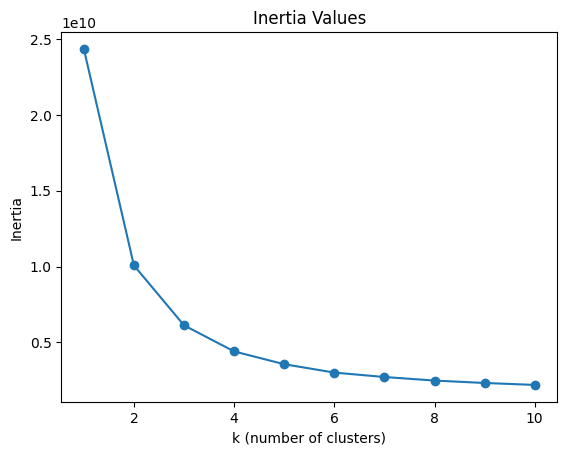

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

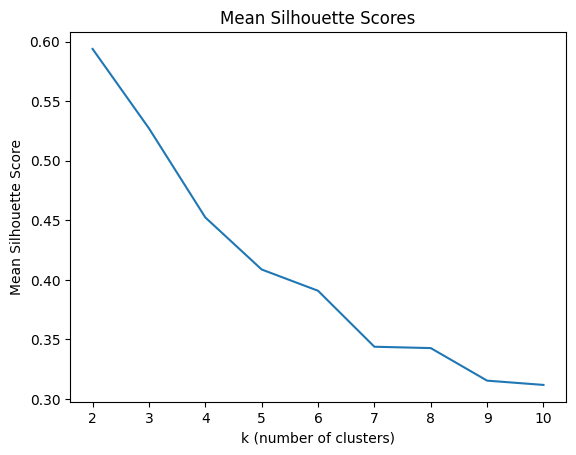

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


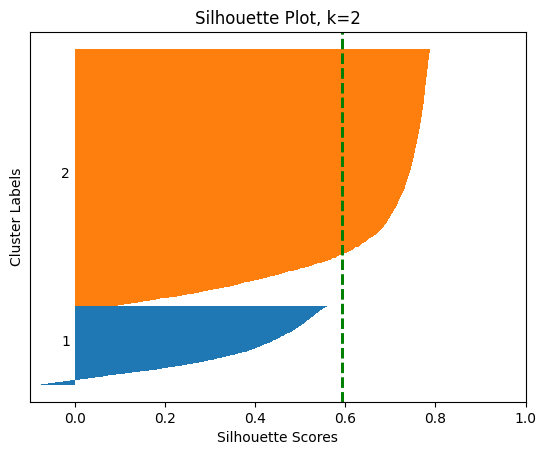

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


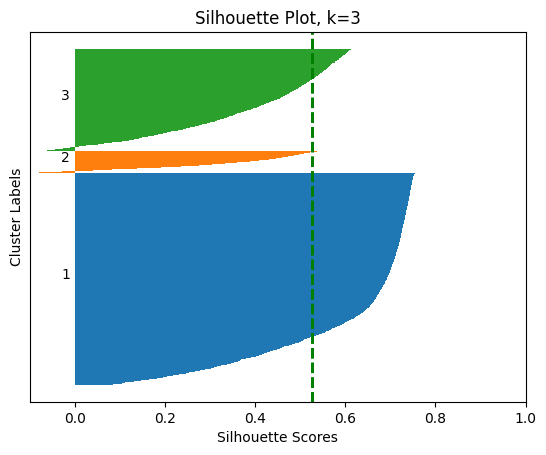

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


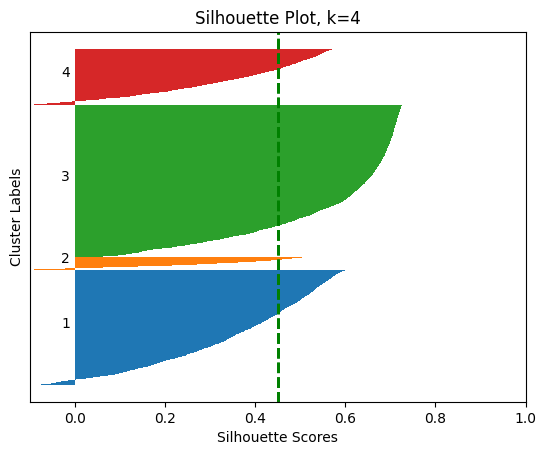

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

In [10]:
### CLUSTERING: DETERMINE OPTIMAL NUMBER OF CLUSTERS ###

# Plot inertia scores
plot_inertia(X)
plt.title("Inertia Values")
plt.show()

# Plot mean silhouette scores
plot_mean_sil(X)
plt.title("Mean Silhouette Scores")
plt.show()

# Plot silhouette distributions for k = 2-6
for k in range(2,4):
    plot_sil(X,k)
    plt.title("Silhouette Plot, k=" + str(k))
    plt.show()

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Cluster Centroids for k = 2')

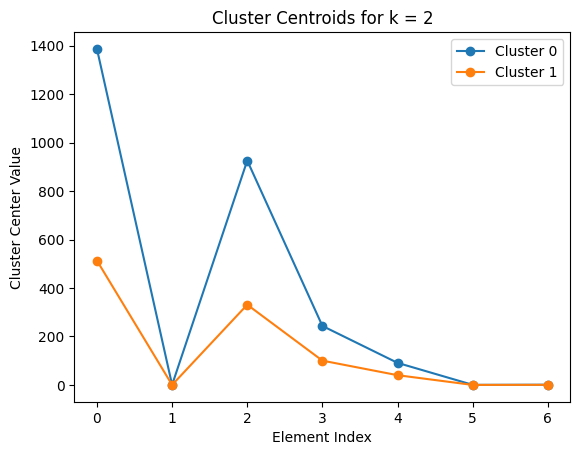

In [13]:
### K-MEANS CLUSTERING ###

best_k = 2
pbe_centroids, pbe_kmeans = k_means(X,best_k)
pbe_pred = pbe_kmeans.fit_predict(X)
plt.title("Cluster Centroids for k = " + str(best_k))
